In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

import matplotlib
matplotlib.rcParams['figure.figsize'] = (12, 8)

import warnings
warnings.filterwarnings('ignore')

# k Nearest Neighbors (kNN)
Метод k ближайших соседей рассчитывает расстояния от нового объекта до всех объектов выборки и, отбирая k ближайших, предсказывает целевую переменную с помощью голосования (в случае классификации) или усреднения (в случае регрессии). \
При этом этот метод можно по-разному настраивать, например можно изменить способ подсчета расстояний или способ взвешивания соседей по расстоянию. \
Для начала скачаем датасет и визуализируем данные.

In [2]:
circ = pd.read_csv(os.path.dirname(os.path.dirname(os.getcwd())) + '/' + 'concertriccir2.csv')
circ.head()

,X,Y,class
0,0.70,-0.247,0.0
1,-3.95,2.740,1.0
2,0.15,-2.160,1.0
3,-1.67,-0.942,1.0
4,2.56,-1.850,1.0


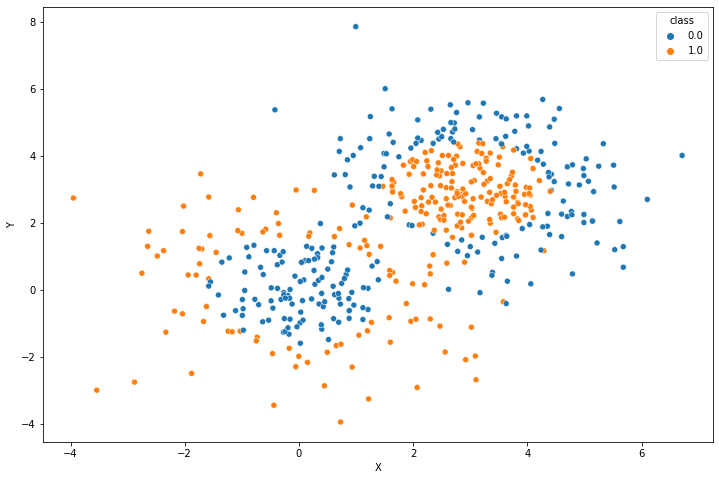

In [3]:
sns.scatterplot(circ['X'], circ['Y'], hue=circ['class']);

**Задание 1.** Обучите логистическую регрессию на данных и нарисуйте разделяющую гиперплоскость (прямую) на рисунке с данными. Как линейный классификатор справился с задачей? Сделайте вывод исходя из геометрии данных и линии разделения. Какой accuracy выйдет на всей выборке (без валидации)?

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

### Your code is here
X_c = circ.drop('class', axis=1)
y_c = circ['class']

pipe = Pipeline([
                # ('scaler', StandardScaler()), 
                ('LR', LogisticRegression())])

pipe.fit(X_c, y_c)

pipe.score(X_c, y_c)

0.424

In [5]:
pipe.named_steps['LR'].coef_.T


array([[-0.00316169],
       [-0.01204832]])

In [6]:
pipe.named_steps['LR'].intercept_

array([0.0284847])

<AxesSubplot:>

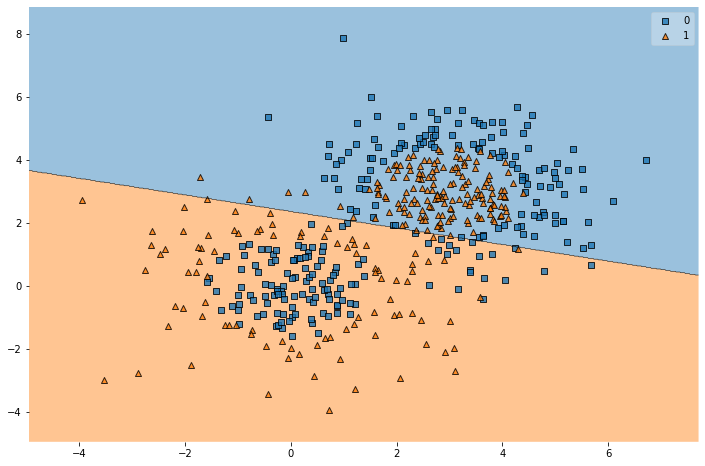

In [7]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X_c.to_numpy(), y_c.astype('int').to_numpy(), clf=pipe)


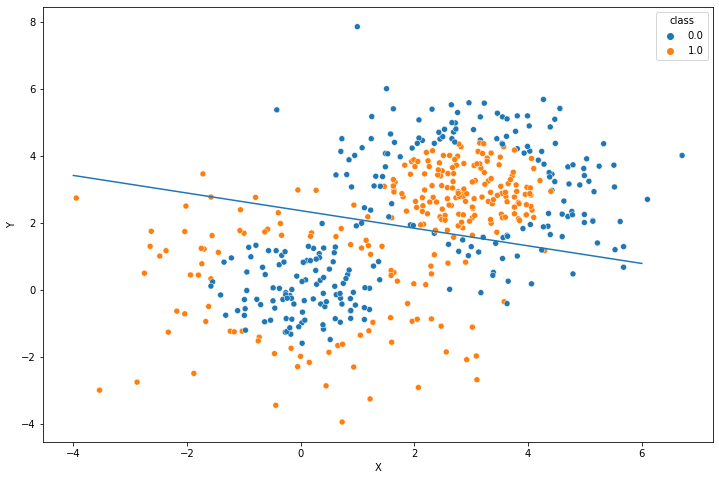

In [8]:
# drawing a line
x = np.linspace(-4, 6, 50)
y = (- x * pipe.named_steps['LR'].coef_[0][0] / pipe.named_steps['LR'].coef_[0][1]) - (pipe.named_steps['LR'].intercept_[0] / pipe.named_steps['LR'].coef_[0][1])

sns.scatterplot(circ['X'], circ['Y'], hue=circ['class'])
plt.plot(x, y)
plt.show();

**Задание 2.** Разделите обучающую выборку и обучите 6 моделей kNN с различным числом соседей из `all_k`, сохраните обученные классификаторы в список. \
Выведите accuracy на тренировочной и тестовой выборке для каждой модели. Каково оптимальное число соседей с точки зрения accuracy?

In [9]:
X = circ[['X', 'Y']].values
y = circ['class'].values.astype('int')

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    shuffle=True, random_state=2022)

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
all_k = [1, 3, 10, 30, 40, 60]

### Your code is here
pipe = Pipeline([('scaler', StandardScaler()),
                ('KNN', KNeighborsClassifier())])

all_clfs = []

for i in all_k:
    pipe = Pipeline([('scaler', StandardScaler()),
                ('KNN', KNeighborsClassifier(n_neighbors=i))])
    pipe.fit(X_train, y_train)
    all_clfs.append(pipe)
    print(f"With {i} neighbours test score is: {pipe.score(X_test, y_test)}")


With 1 neighbours test score is: 0.89
With 3 neighbours test score is: 0.87
With 10 neighbours test score is: 0.85
With 30 neighbours test score is: 0.74
With 40 neighbours test score is: 0.75
With 60 neighbours test score is: 0.73


**Задание 3.** (бонусное) Скачайте библиотку [mlxtend](http://rasbt.github.io/mlxtend/#examples) для визуализации решающих поверхностей. 
В документации можно ознакомиться с [примерами](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) изображения решающих поверхностей для различных моделей. \
Построим несколько таких графиков для шести обученных нами kNN.

1. Подберите параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов. 
2. Удобно перед визулизацией сохранить обученные классификаторы в список `all_clfs`.
3. Проявите терпение! Отрисовка решающих поверхностей может занимать пару минут.

In [12]:
import mlxtend
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools

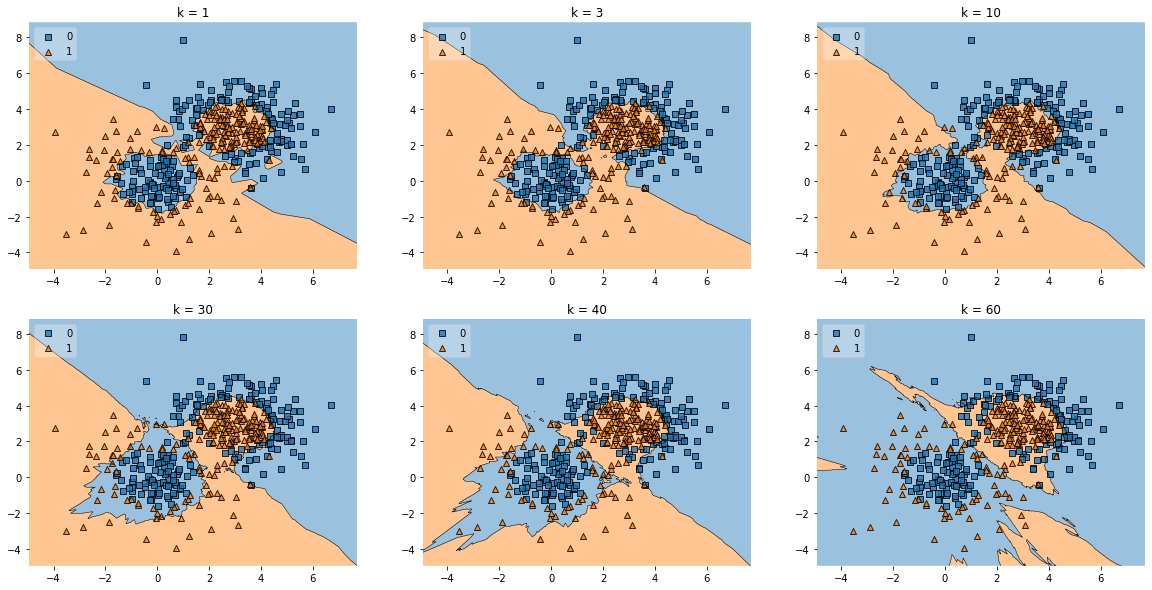

In [13]:
### Your code is here

gs = gridspec.GridSpec(2, 3)
fig = plt.figure(figsize=(20, 10))

labels = ['k = 1', 'k = 3', 'k = 10', 'k = 30', 'k = 40', 'k = 60']
for clf, lab, grd in zip(all_clfs,
                         labels,
                         itertools.product([0, 1], [0, 1, 2])):
    ax = plt.subplot(gs[grd])
    fig = plot_decision_regions(X_train, y_train, clf=clf, legend=2)
    plt.title(lab)
plt.show()



1. Как меняется решающая поверхность с ростом числа соседей?
2. Какое оптимальное число соседей с точки зрения устройства данных и геометрии решающих поверхностей? Поясните свой ответ, опираясь на полученные графики.
3. Лучше ли справляется kNN по сравнению с логистической регрессией?

**Задание 4.** Скачайте уже известный вам датасет [SigmaCabs](https://www.kaggle.com/datasets/arashnic/taxi-pricing-with-mobility-analytics). Обучите классификатор kNN на отнормированных и не отнормированных данных, подобрав лучшие гиперпараметры среди $k \in [1, 5, 10]$. Замерьте качество на тестовой выборке. \
Почему нормирование данных помогает улучшить качество?

In [26]:
df = pd.read_csv(os.path.dirname(os.path.dirname(os.getcwd())) + '/' + 'processed_sigma_cabs.csv')
df.head()


,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Surge_Pricing_Type,Type_of_Cab_B,...,Destination_Type_F,Destination_Type_G,Destination_Type_H,Destination_Type_I,Destination_Type_J,Destination_Type_K,Destination_Type_L,Destination_Type_M,Destination_Type_N,Gender_Male
0,6.77,1.0,2.42769,3.90500,0,40.0,46,60,2,1,...,0,0,0,0,0,0,0,0,0,0
1,29.47,10.0,2.78245,3.45000,0,38.0,56,78,2,1,...,0,0,0,0,0,0,0,0,0,1
2,41.58,10.0,2.79805,3.50125,2,61.0,56,77,2,1,...,0,0,0,0,0,0,0,0,0,1
3,61.56,10.0,2.79805,3.45375,0,61.0,52,74,3,0,...,0,0,0,0,0,0,0,0,0,1
4,54.95,10.0,3.03453,3.40250,4,51.0,49,102,2,0,...,0,0,0,0,0,0,0,0,0,1


In [27]:
X = df.drop('Surge_Pricing_Type', axis=1)
y = df['Surge_Pricing_Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    shuffle=True, random_state=2022)

custom_cv = [(X_train.index.to_list(), X_test.index.to_list())]


In [32]:
X_train

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Type_of_Cab_B,Type_of_Cab_C,...,Destination_Type_F,Destination_Type_G,Destination_Type_H,Destination_Type_I,Destination_Type_J,Destination_Type_K,Destination_Type_L,Destination_Type_M,Destination_Type_N,Gender_Male
105963,100.88,2.0,3.15274,3.54500,0,61.0,58,92,1,0,...,0,0,0,0,0,0,0,0,0,1
94692,36.35,6.0,2.79805,2.84375,0,61.0,49,65,0,1,...,0,0,0,0,0,0,0,0,0,1
105758,7.08,10.0,2.72208,3.09125,1,61.0,59,93,1,0,...,0,1,0,0,0,0,0,0,0,1
71841,21.19,10.0,2.79599,1.62500,0,61.0,58,78,0,0,...,0,0,0,0,0,0,0,0,0,1
65367,45.71,1.0,2.79805,3.48000,1,34.0,56,76,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15145,61.68,2.0,2.84332,3.20375,0,60.0,48,64,1,0,...,0,0,0,0,0,0,0,0,0,1
56629,107.71,4.0,2.99722,3.23250,0,37.0,51,86,0,0,...,0,0,0,0,0,0,0,0,0,1
103024,47.58,10.0,2.79805,3.66375,1,61.0,48,89,1,0,...,0,0,0,0,0,0,0,0,0,0
1244,26.05,10.0,2.79805,2.48500,0,43.0,53,74,0,1,...,0,0,0,0,0,0,0,0,0,1


In [33]:
### Your code is here
pipe = Pipeline([('scaler', StandardScaler()),
                ('KNN', KNeighborsClassifier())])


param_grid = {'KNN__n_neighbors': [1, 5, 10]}

search = GridSearchCV(pipe, param_grid, scoring='accuracy', cv=custom_cv,
                      return_train_score=True, verbose=1)
search.fit(X, y)
display(search.cv_results_)

knn_ne_norm = KNeighborsClassifier()
param_grid = {'n_neighbors': [1, 5, 10]}
search = GridSearchCV(knn_ne_norm, param_grid, scoring='accuracy', cv=custom_cv,
                      return_train_score=True, verbose=3)
search.fit(X, y)
display(search.cv_results_)



Fitting 1 folds for each of 3 candidates, totalling 3 fits


{'mean_fit_time': array([0.44082141, 0.4009285 , 0.40790892]),
 'std_fit_time': array([0., 0., 0.]),
 'mean_score_time': array([3.72304988, 3.71208167, 3.83674645]),
 'std_score_time': array([0., 0., 0.]),
 'param_KNN__n_neighbors': masked_array(data=[1, 5, 10],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'KNN__n_neighbors': 1},
  {'KNN__n_neighbors': 5},
  {'KNN__n_neighbors': 10}],
 'split0_test_score': array([0.56488057, 0.63038773, 0.66076786]),
 'mean_test_score': array([0.56488057, 0.63038773, 0.66076786]),
 'std_test_score': array([0., 0., 0.]),
 'rank_test_score': array([3, 2, 1]),
 'split0_train_score': array([1.        , 0.73491631, 0.7076019 ]),
 'mean_train_score': array([1.        , 0.73491631, 0.7076019 ]),
 'std_train_score': array([0., 0., 0.])}

Fitting 1 folds for each of 3 candidates, totalling 3 fits
[CV 1/1] END .n_neighbors=1;, score=(train=1.000, test=0.438) total time=   4.1s
[CV 1/1] END .n_neighbors=5;, score=(train=0.630, test=0.443) total time=   4.0s
[CV 1/1] END n_neighbors=10;, score=(train=0.585, test=0.470) total time=   4.0s


{'mean_fit_time': array([0.33909416, 0.34507871, 0.3420856 ]),
 'std_fit_time': array([0., 0., 0.]),
 'mean_score_time': array([3.86766267, 3.7230494 , 3.74299669]),
 'std_score_time': array([0., 0., 0.]),
 'param_n_neighbors': masked_array(data=[1, 5, 10],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 1}, {'n_neighbors': 5}, {'n_neighbors': 10}],
 'split0_test_score': array([0.43819542, 0.44317017, 0.47036038]),
 'mean_test_score': array([0.43819542, 0.44317017, 0.47036038]),
 'std_test_score': array([0., 0., 0.]),
 'rank_test_score': array([3, 2, 1]),
 'split0_train_score': array([1.        , 0.63029175, 0.58486267]),
 'mean_train_score': array([1.        , 0.63029175, 0.58486267]),
 'std_train_score': array([0., 0., 0.])}

**Задание 5.** Обучите классификатор kNN на отнормированных данных с помощью метрики Минковского. 
$$
\rho(x, z) = \bigg(\sum_i |x_i - z_i|^p\bigg) ^{1/p}
$$

Значение параметра `p` возьмите равным единице. Замерьте качество на тестовой выборке и сравните с предыдущим заданием, где `p = 2`.

In [34]:
### Your code is here
from sklearn.metrics import accuracy_score

pipe_new = Pipeline([('scaler', StandardScaler()),
                ('KNN', KNeighborsClassifier(n_neighbors=10, metric='minkowski', p=1))])

pipe_new.fit(X_train, y_train)
pipe_new.score(X_test, y_test)

accuracy_score(y_test, pipe_new.predict(X_test))


0.6611476094634109

**Задание 6.** Скачайте датасет [California Housing Prices](https://www.kaggle.com/datasets/camnugent/california-housing-prices), в котором мы будем предсказывать среднюю стоимость жилья. В качестве признаков будем использовать `['longitude', 'latitude']`, посмотрите на них с помощью scatterplot. \
По какой характеристике наш kNN регрессор в этом случае подбирает соседей?

1. Обучите обыкновенную линейную регрессию и замерьте RMSE на тренировочной и тестовой выборках.
2. Обучите kNN регрессор на отнормированных данных, подобрав лучшие гиперпараметры $k \in [1, 2, ..., 9]$. 
3. Обучите kNN регрессор с гауссовским ядром, взяв параметр k из предыдущего пункта и подобрав оптимальное значение ширины окна среди предложенных $h \in np.arange(0.02, 0.1, 0.01)$.

Как ширина окна влияет на веса при усреднении ответа по соседям? 

In [35]:
df = pd.read_csv(os.path.dirname(os.path.dirname(os.getcwd())) + '/' + 'housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


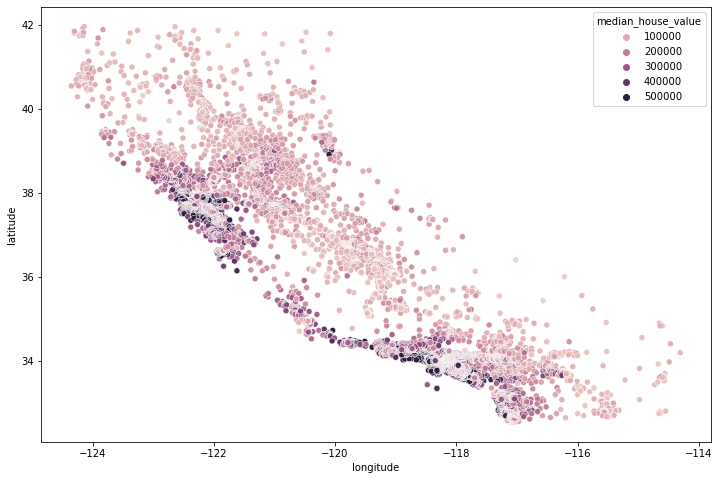

In [36]:
X = df[['longitude', 'latitude']]
y = df['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    shuffle=True, random_state=2022)
sns.scatterplot('longitude', 'latitude', data=X, hue=y);

In [ ]:
### Your code is here

